<a href="https://colab.research.google.com/github/kailee0422/Big-Data/blob/master/1119.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
system("ls", TRUE)


[1] "sample_data"

In [2]:
pkgs <-c("tidyverse","lubridate")
install.packages(pkgs)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
library(tidyverse)
liberay(lubridate)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



ERROR: ignored

In [4]:
nobel <-read.csv("nobel_winners.csv")

In [5]:
nobel %>% count(category)

category,n
<chr>,<int>
Chemistry,194
Economics,83
Literature,113
Medicine,227
Peace,130
Physics,222


In [6]:
install.packages("showtext")
library(showtext)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sysfonts’, ‘showtextdb’


Loading required package: sysfonts

Loading required package: showtextdb



In [7]:
showtext.auto(enable = TRUE)

'showtext.auto()' is now renamed to 'showtext_auto()'
The old version still works, but consider using the new function in future code



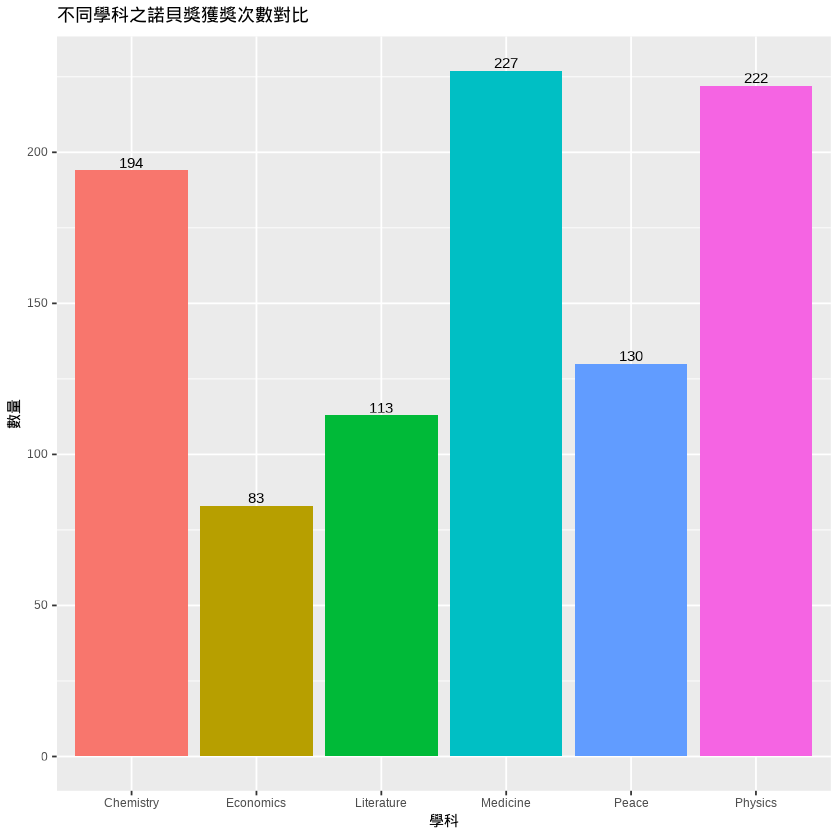

In [8]:
nobel %>%
  count(category) %>%
  ggplot(aes(x = category, y = n, fill = category)) +
  geom_col() +
  geom_text(aes(label = n), vjust = -0.25) +
  labs(title = "不同學科之諾貝獎獲獎次數對比", x = "學科", y = "數量") + theme(legend.position = "none")

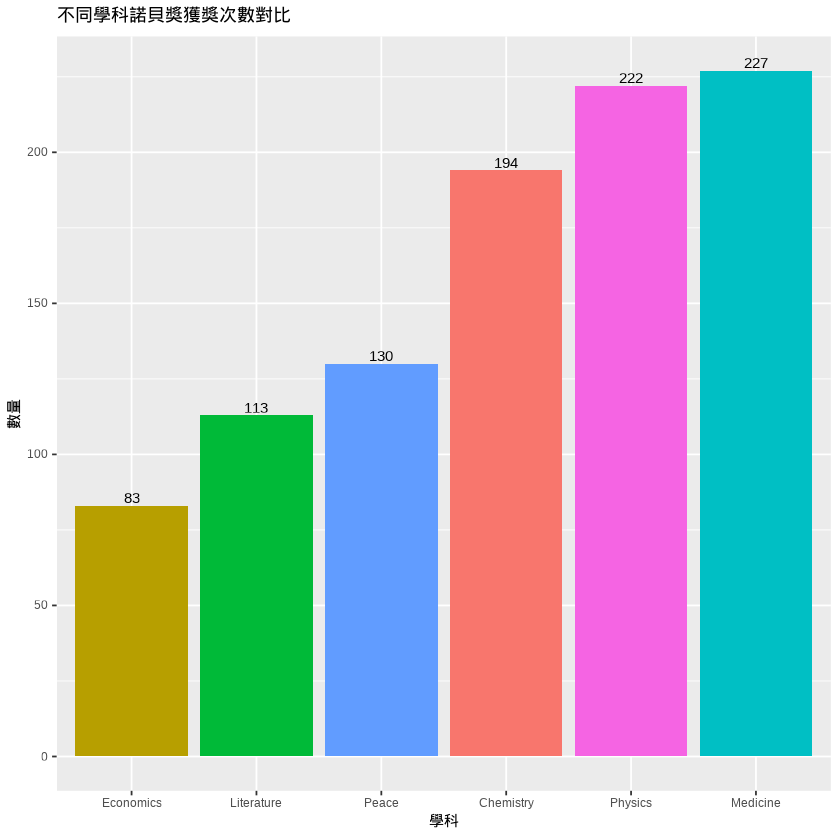

In [9]:
nobel %>%
  count(category) %>%
  ggplot(aes(x = fct_reorder(category, n), y = n, fill = category)) +
  geom_col() +
  geom_text(aes(label = n), vjust = -0.25) +
  labs(title = "不同學科諾貝獎獲獎次數對比", x = "學科", y = "數量") +  theme(legend.position = "none")

In [10]:
nobel %>%
  dplyr::filter(birth_country == "United States of America") %>%
  dplyr::select(full_name, prize_year, category)

full_name,prize_year,category
<chr>,<int>,<chr>
Theodore Roosevelt,1906,Peace
Elihu Root,1912,Peace
Theodore William Richards,1914,Chemistry
Thomas Woodrow Wilson,1919,Peace
Robert Andrews Millikan,1923,Physics
Charles Gates Dawes,1925,Peace
Arthur Holly Compton,1927,Physics
Frank Billings Kellogg,1929,Peace
Sinclair Lewis,1930,Literature


In [11]:
nobel %>%
  dplyr::filter(birth_country == "Taiwan") %>%
  dplyr::select(full_name, prize_year, category)

full_name,prize_year,category
<chr>,<int>,<chr>
Yuan T. Lee,1986,Chemistry


In [12]:
nobel_winners <- nobel %>%
  mutate_if(is.character, tolower) %>%
  distinct_at(vars(full_name, prize_year, category), .keep_all = TRUE) %>%
  mutate(
    decade = 10 * (prize_year %/% 10),
    prize_age = prize_year - year(birth_date)
  )

nobel_winners

ERROR: ignored

In [13]:
nobel_winners %>% count(full_name, sort = T)


ERROR: ignored

In [14]:
nobel_winners %>%
  count(prize_age) %>%
  ggplot(aes(x = prize_age, y = n)) +
  geom_col()

ERROR: ignored

In [15]:

nobel_winners %>%
  group_by(category) %>%
  summarise(mean_prize_age = mean(prize_age, na.rm = T))

ERROR: ignored

In [ ]:

nobel_winners %>%
  mutate(category = fct_reorder(category, prize_age, median, na.rm = TRUE)) %>%
  ggplot(aes(category, prize_age)) +
  geom_point() +
  geom_boxplot() +
  coord_flip()

In [ ]:
install.packages("ggridges")


In [ ]:
library(ggridges)

nobel_winners %>%
  ggplot(aes(
    x = prize_age,
    y = category,
    fill = category
  )) +
  geom_density_ridges()

In [ ]:
nobel_winners %>%
  dplyr::filter(laureate_type == "individual") %>%
  count(category, gender) %>%
  group_by(category) %>%
  mutate(prop = n / sum(n))

In [ ]:
nobel_winners %>%
  dplyr::filter(laureate_type == "individual") %>%
  # mutate(decade = glue::glue("{round(prize_year - 1, -1)}s")) %>%
  count(decade, category, gender) %>%
  group_by(decade, category) %>%
  mutate(prop = n / sum(n)) %>%
  ggplot(aes(decade, category, fill = prop)) +
  geom_tile(size = 0.7) +
  # geom_text(aes(label = scales::percent(prop, accuracy = .01))) +
  geom_text(aes(label = scales::number(prop, accuracy = .01))) +
  facet_grid(vars(gender)) +
  scale_fill_gradient(low = "#FDF4E9", high = "#834C0D")

In [ ]:

install.packages("ggbeeswarm")
library(ggbeeswarm)  

nobel_winners %>%
  ggplot(aes(
    x = category,
    y = prize_age,
    colour = gender,
    alpha = gender
  )) +
  ggbeeswarm::geom_beeswarm() +
  coord_flip() +
  scale_color_manual(values = c("#BB1288", "#5867A6")) +
  scale_alpha_manual(values = c(1, .4)) +
  theme_minimal() +
  theme(legend.position = "top") +
  labs(
    title = "諾獎獲得者性別不平衡",
    subtitle = "1901年-2016年數據",
    colour = "Gender",
    alpha = "Gender",
    x = "學科",
    y = "獲獎年齡"
  )

In [ ]:

nobel_winners %>%
  count(decade,
    category,
    gender = coalesce(gender, laureate_type)
  ) %>%
  group_by(decade, category) %>%
  mutate(percent = n / sum(n)) %>%
  ggplot(aes(decade, n, fill = gender)) +
  geom_col() +
  facet_wrap(~category) +
  labs(
    x = "Decade",
    y = "# of nobel prize winners",
    fill = "Gender",
    title = "Nobel Prize gender distribution over time"
  )

In [ ]:
nobel_winners %>%
  select(category, birth_date) %>%
  mutate(year = floor(year(birth_date) / 10) * 10) %>%
  count(category, year) %>%
  dplyr::filter(!is.na(year)) %>%
  ggplot(aes(x = year, y = n)) +
  geom_col() +
  scale_x_continuous(breaks = seq(1810, 1990, 20)) +
  geom_text(aes(label = n), vjust = -0.25) +
  facet_wrap(vars(category))